In [52]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/aremath/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['product', 'Infinity']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [32]:
import scipy.sparse
import sklearn.manifold
from sm_rando.world_rando.model_checking import *
from functools import reduce

In [102]:
out_path = Path("../output")
rules, tests = parse_rules.parse_rules(["../encoding/rules/rules.yaml",
        "../encoding/rules/model_checking_tests/model_checking_tests.yaml"])
c1 = verify(tests["ModifiedConstructionZone1"], rules.values(), no_softlocks, out_path, no_softlocks_inner)
c2 = verify(tests["ModifiedConstructionZone2"], rules.values(), no_softlocks, out_path, no_softlocks_inner)

Search to reach None from c(39,9)


  7%|▋         | 251/3645 [00:00<00:02, 1217.03it/s]

Applied 3646 rules
Enumerated 3645 states in 3.2437752000114415 seconds


100%|██████████| 3645/3645 [00:03<00:00, 1123.58it/s]


Number of States: 3645
Built graph with 15344 edges in 3.3696537999931024 seconds
Checked model in 0.6749611999985063 seconds
Search to reach None from c(39,9)


  3%|▎         | 120/4700 [00:00<00:03, 1197.68it/s]

Applied 4701 rules
Enumerated 4700 states in 4.414189500006614 seconds


100%|██████████| 4700/4700 [00:04<00:00, 1071.85it/s]


Number of States: 4700
Built graph with 19625 edges in 4.544637599989073 seconds
Checked model in 0.6275319999986095 seconds
{(c(13,16)|V: 1, H: RUN, 0|JUMP|ISet(['M'])), (c(13,15)|V: 1, H: RUN, 0|JUMP|ISet(['M'])), (c(13,15)|V: 0, H: RUN, 0|JUMP|ISet(['M']))}
[(c(39,9)|V: 0, H: RUN, 0|STAND|ISet([])), (c(40,9)|V: 0, H: RUN, 0|STAND|ISet([])), (c(41,9)|V: 0, H: RUN, 0|STAND|ISet([])), (c(42,9)|V: 0, H: RUN, 0|STAND|ISet([])), (c(43,9)|V: 0, H: RUN, 0|STAND|ISet([])), (c(44,10)|V: 0, H: RUN, 0|STAND|ISet([])), (c(45,10)|V: 0, H: RUN, 0|STAND|ISet([])), (c(48,3)|V: 0, H: RUN, 0|JUMP|ISet([])), (c(48,4)|V: 1, H: RUN, 0|JUMP|ISet([])), (c(48,5)|V: 1, H: RUN, 0|JUMP|ISet([])), (c(48,6)|V: 1, H: RUN, 0|JUMP|ISet([])), (c(48,7)|V: 1, H: RUN, 0|JUMP|ISet([])), (c(48,8)|V: 1, H: RUN, 0|JUMP|ISet([])), (c(48,9)|V: 1, H: RUN, 0|JUMP|ISet([])), (c(48,10)|V: 1, H: RUN, 0|JUMP|ISet([])), (c(48,10)|V: 0, H: RUN, 0|STAND|ISet([])), (c(49,10)|V: 0, H: RUN, 0|STAND|ISet([])), (c(50,10)|V: 0, H: RUN, 0|S

In [13]:
k_c1 = c1[1]
k_c2 = c2[1]

In [34]:
def make_embedding(ks):
    k_states = [set(k.states()) for k in ks]
    all_states = reduce(lambda x,y: x | y, k_states)
    state_ids = {k:i for i,k in enumerate(all_states)}
    return state_ids
    
def kripke_to_graph(k, embedding):
    edges = []
    for s1, s2 in k.transitions():
        s1_id = str(embedding[s1])
        s2_id = str(embedding[s2])
        edges.append((s1_id, s2_id))
    return np.array(edges)

In [35]:
embedding = make_embedding([k_c1, k_c2])
g1 = kripke_to_graph(k_c1, embedding)
g2 = kripke_to_graph(k_c2, embedding)

In [47]:
n = len(embedding)
g1_matrix = scipy.sparse.coo_matrix(
    (np.ones(len(g1)),(g1[:,0],g1[:,1])),
    shape=(n,n))

In [49]:
%%time
g1_embedding = sklearn.manifold.SpectralEmbedding(
    n_components=3,
    affinity='precomputed')

g1_embedding.fit(g1_matrix)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 12.5 s, sys: 14.6 s, total: 27.1 s
Wall time: 2.54 s


SpectralEmbedding(affinity='precomputed', n_components=3)

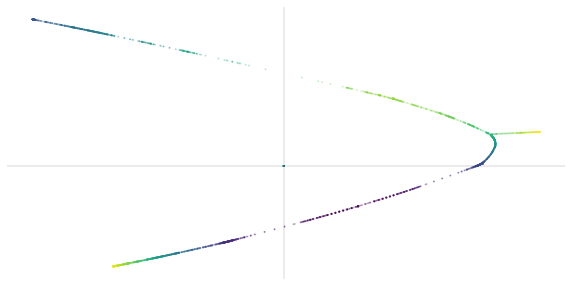

In [53]:
figsize(10,5);
axis('off');
scatter(g1_embedding.embedding_[:,1],
        g1_embedding.embedding_[:,0],
        s=1,
        c=g1_embedding.embedding_[:,2],
        alpha=0.25,
        );
axhline(0,color='black',alpha=0.1);
axvline(0,color='black',alpha=0.1);

In [55]:
g12 = np.concatenate([g1, g2])

In [58]:
g12_matrix = scipy.sparse.coo_matrix(
    (np.ones(len(g12)),(g12[:,0],g12[:,1])),
    shape=(n,n))

In [59]:
%%time
g12_embedding = sklearn.manifold.SpectralEmbedding(
    n_components=3,
    affinity='precomputed')

g12_embedding.fit(g12_matrix)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)


CPU times: user 24 s, sys: 30.2 s, total: 54.2 s
Wall time: 4.95 s


SpectralEmbedding(affinity='precomputed', n_components=3)

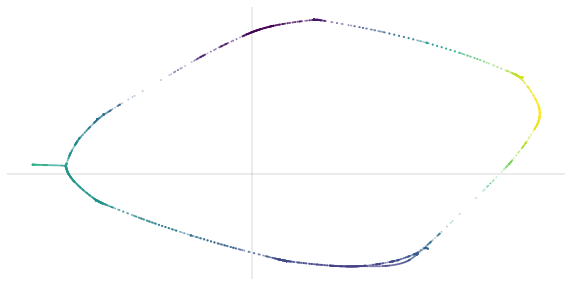

In [60]:
figsize(10,5);
axis('off');
scatter(g12_embedding.embedding_[:,1],
        g12_embedding.embedding_[:,0],
        s=1,
        c=g12_embedding.embedding_[:,2],
        alpha=0.25,
        );
axhline(0,color='black',alpha=0.1);
axvline(0,color='black',alpha=0.1);

In [112]:
goal_state = tests["ModifiedConstructionZone2"][1]
for state in k_c2.S0:
    initial_state = state
softlock_state = c2[2][-1]
big_states = [initial_state, goal_state, softlock_state]

In [113]:
def state_to_color(state):
    color = 0
    i = state.items
    if "M" in i:
        color |= 2**0
    if "MB" in i:
        color |= 2**1
    return color

colors = np.zeros(n, dtype=int)
for state in k_c1.states():
    state_id = embedding[state]
    #colors[state_id] |= 2**0
    colors[state_id] = state_to_color(state)
for state in k_c2.states():
    state_id = embedding[state]
    #colors[state_id] |= 2**1
    colors[state_id] = state_to_color(state)

initial_state_id = embedding[initial_state]
#colors[initial_state_id] = 4
sizes = np.ones(n, dtype=int)
for state in big_states:
    sizes[embedding[state]] = 400

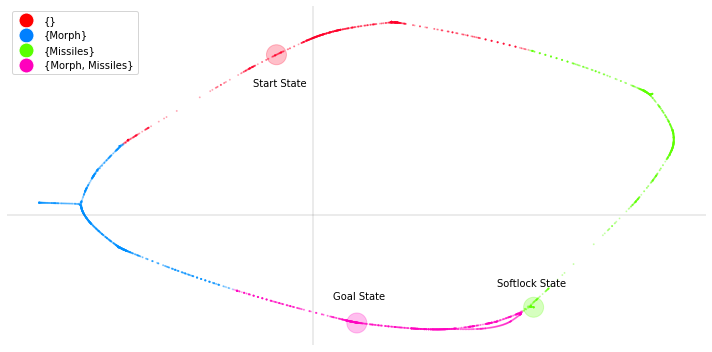

In [149]:
figsize(10,5);
axis('off');
scatter(g12_embedding.embedding_[:,1],
        g12_embedding.embedding_[:,0],
        s=sizes,
        c=colors,
        alpha=0.25,
        cmap="gist_rainbow");
axhline(0,color='black',alpha=0.1);
axvline(0,color='black',alpha=0.1);
legend_elements = [Line2D([0], [0], marker='o', color="w", markerfacecolor=(1, 0, 0), label='{}', markersize=15),
                   Line2D([0], [0], marker='o', color="w", markerfacecolor=(0, 0.5, 1), label='{Morph}', markersize=15),
                   Line2D([0], [0], marker='o', color="w", markerfacecolor=(0.35, 1, 0), label='{Missiles}', markersize=15),
                   Line2D([0], [0], marker='o', color="w", markerfacecolor=(1, 0, 0.74), label='{Morph, Missiles}', markersize=15),
                  ]
legend(handles=legend_elements)
annotate("Start State", xy=(-0.0025, 0.009))
annotate("Goal State", xy=(0.0008, -0.0059))
annotate("Softlock State", xy=(0.0076, -0.0050))
tight_layout()
savefig("embedding.pdf")